The project was to determine which Pittsburgh neighborhood would be best for children, and so I choose to see which neighborhoods had the best schools. I determined this by finding the percentage of kids that were enrolled in the school's gifted programs. 
I am using the dataset:
Schools in pittsburgh cities: IEP by neighborhood
https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep/resource/62403582-e6c3-40b6-9bb6-d5d38e3f058d

In [7]:
import pandas as pd
import geopandas
schools = pd.read_csv("neighborhood_iep.csv")
schools['percentage_of_gifted'] = round((schools['gifted'] / schools['total_enrollment_k_12']) * 100, 2)
df = pd.DataFrame(schools).sort_values(by=['percentage_of_gifted'], ascending=False).set_index('neighborhoods')
neighborhood_list = []
gifted_list = []

for index, row in schools.iterrows():
    neighborhoods = row['neighborhoods']
    gifted = row['percentage_of_gifted']
    split = neighborhoods.split(", ")
    length = len(split)
    i = 0
    while i < len(split):
        neighborhood_list.append(split[i])
        gifted_list.append(gifted)
        i += 1
dictionary = {'Neighborhoods':neighborhood_list, 'Percentage_of_Gifted':gifted_list}
df2 = pd.DataFrame(dictionary, columns=['Neighborhoods', 'Percentage_of_Gifted']).sort_values(by=['Percentage_of_Gifted'], ascending=False).set_index('Neighborhoods')

maxValue = df2.iloc[0,0]
for i, row in df2.iterrows():
    score = row["Percentage_of_Gifted"]/maxValue
    df2.at[i, "Overall Score"] = round(score, 2)
df2

,Percentage_of_Gifted,Overall Score
Neighborhoods,,
Squirrel Hill North,32.93,1.00
Swisshelm Park,32.22,0.98
Regent Square,32.22,0.98
Squirrel Hill South,32.22,0.98
Point Breeze,31.70,0.96
...,...,...
Sheraden,2.20,0.07
Hill District,2.20,0.07
Spring Hill,1.68,0.05


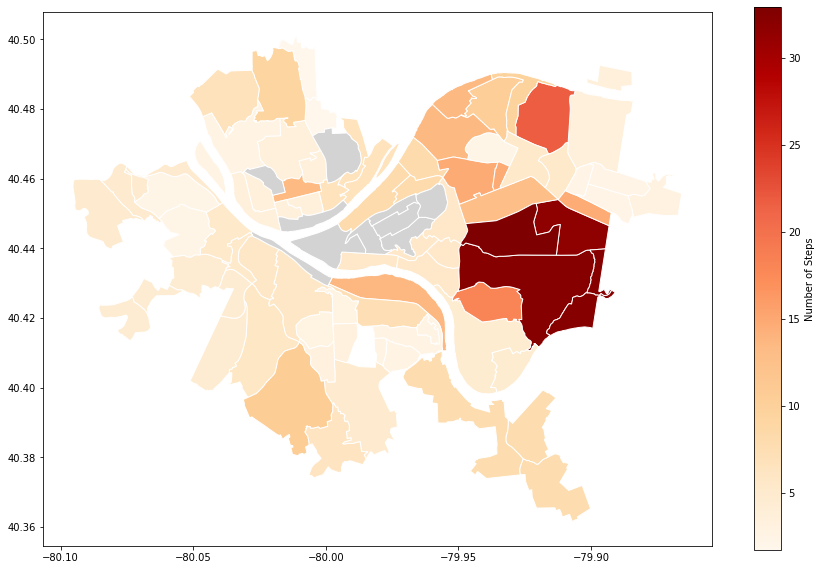

In [17]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods_map = neighborhoods.merge(df2, how='left', left_on='hood', right_on='Neighborhoods')
neighborhoods_map[['hood','Percentage_of_Gifted','geometry']].head()
neighborhoods_map.plot(column='Percentage_of_Gifted', cmap='OrRd', edgecolor="white", legend=True, 
                       legend_kwds={'label': "Number of Steps"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

Seeing the percentage of the gifted students enrolled in each neighborhood, we can see that Squirrel Hill North has the best schools out of all the Pittsburgh neighborhoods, and is the best neighborhood to raise children in according to the data.